___
# <font color= #d4b1e6> **Proyecto 1: MNIST** </font>
- <Strong> Nombre de los integrantes: </Strong>  <font color="blue">`Sarah Lucía Beltrán, Priscila Cervantes Ramírez, Mónica Ibarra Herrera & Antonia Horburger` </font>
- <Strong> Materia: </Strong>  <font color="blue">`Aprendizaje Máquina` </font>
___

A continuación, se trabajará con el dataset de Fashion-MNIST, un dataset que contiene imágenes de 10 diferentes clases de prendas, cuenta con 60,000 imágenes de entrenamiento y 10,000 de prueba.

Se utlizarán 5 diferentes modelos para clasificar entre las 10 clases de prendas que contiene el dataset:

- Regresión Logística
- Support Vector Machine (SVM)
- Random Forest
- Redes Neuronales (MLP)
- CNN


*Librerías a utlizar*

In [16]:
# Importar librerías 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.datasets import fetch_openml
from PIL import Image

*Importación de los datos mediante scikit-learn*

In [3]:
X, y = fetch_openml("Fashion-MNIST", version=1, return_X_y=True, as_frame=False)
y = y.astype(int)

*Visualizar algunas imágenes*

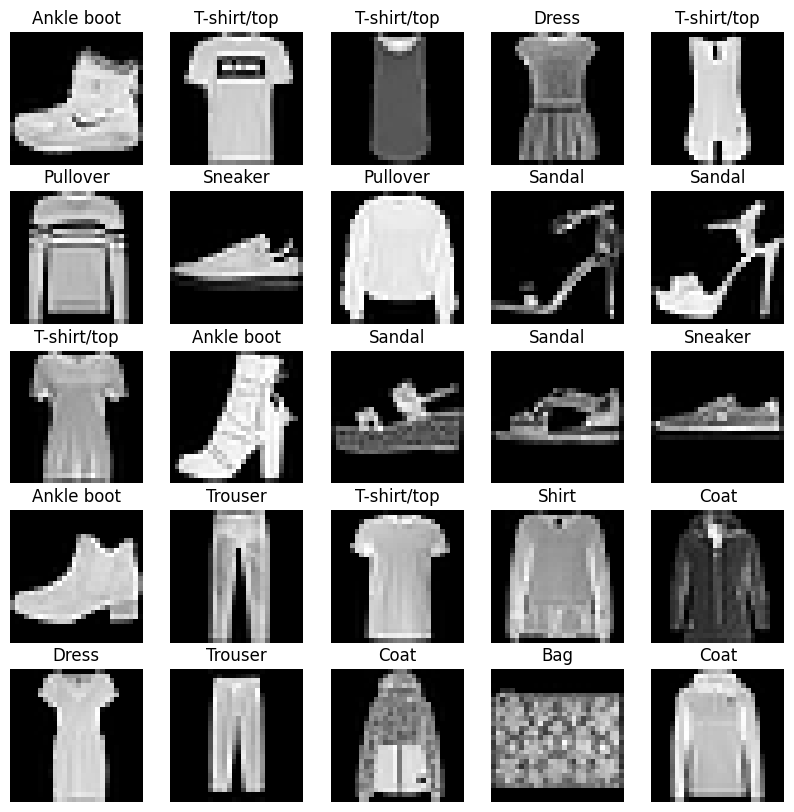

In [5]:
# Clases
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Visualizar las primeras 25 imágenes
plt.figure(figsize=(10,10))
for i in range(25):
    img = X[i].reshape(28,28)   # Reconstruir la imagen 28x28
    plt.subplot(5,5,i+1)
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.title(class_names[y[i]])
plt.show()

*División de entrenamiento y prueba*

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42, stratify=y)

*Estandarización*

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_test)

*PCA*

In [8]:
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

## <font color= #d4b1e6> **Regresión Logística** </font>

In [9]:
# Entrenar Logistic Regression
logreg = LogisticRegression(max_iter=1000, solver="saga", multi_class="multinomial", n_jobs=-1)
logreg.fit(X_train_pca, y_train)

# Predecir
y_pred_log = logreg.predict(X_val_pca)


c:\Users\prisc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\prisc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


*Métrica de desempeño*

In [10]:
print("Accuracy Logistic Regression:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log, target_names=class_names))

Accuracy Logistic Regression: 0.8429
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.83      0.82      1000
     Trouser       0.98      0.95      0.96      1000
    Pullover       0.74      0.72      0.73      1000
       Dress       0.82      0.87      0.84      1000
        Coat       0.72      0.77      0.74      1000
      Sandal       0.92      0.92      0.92      1000
       Shirt       0.63      0.55      0.59      1000
     Sneaker       0.91      0.91      0.91      1000
         Bag       0.96      0.95      0.96      1000
  Ankle boot       0.94      0.95      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



## <font color= #d4b1e6> **SVM** </font>

In [13]:
svm_clf = SVC(kernel="rbf", random_state=42)
svm_clf.fit(X_train_pca, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


*Métricas de desempeño*

In [14]:
# Métricas de desempeño
y_pred_svm = svm_clf.predict(X_val_pca)
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precisión (Precision): {precision_score(y_test, y_pred_svm, average='macro'):.4f}")
print(f"Sensibilidad (Recall): {recall_score(y_test, y_pred_svm, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm, average='macro'):.4f}")

Exactitud (Accuracy): 0.8861
Precisión (Precision): 0.8854
Sensibilidad (Recall): 0.8861
F1-Score: 0.8848


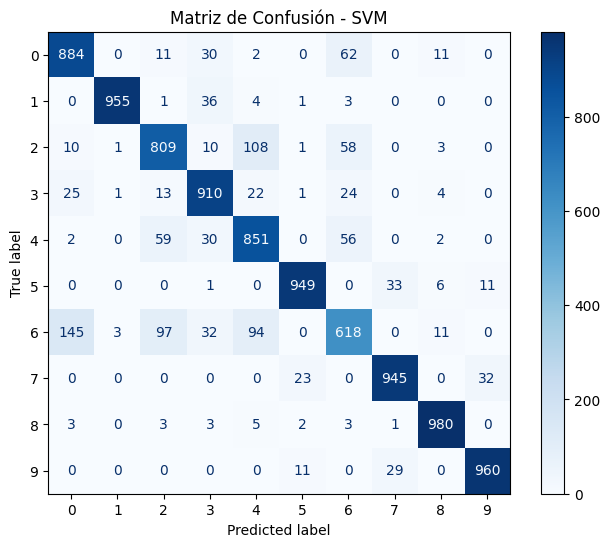

In [15]:
# Matriz de confusión
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_clf.classes_)
plt.figure(figsize=(8,6))
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
plt.title("Matriz de Confusión - SVM")
plt.show()

## <font color= #d4b1e6> **Random Forest** </font>

## <font color= #d4b1e6> **Redes Neuronales MLP** </font>

In [11]:
mlp = MLPClassifier(hidden_layer_sizes=(128,), max_iter=100, random_state=42, verbose=True)
mlp.fit(X_train_pca, y_train)

y_pred_mlp = mlp.predict(X_val_pca)


Iteration 1, loss = 0.68579624
Iteration 2, loss = 0.39259096
Iteration 3, loss = 0.35308839
Iteration 4, loss = 0.32677068
Iteration 5, loss = 0.30976943
Iteration 6, loss = 0.29387941
Iteration 7, loss = 0.28260513
Iteration 8, loss = 0.27284585
Iteration 9, loss = 0.26388956
Iteration 10, loss = 0.25817056
Iteration 11, loss = 0.25002627
Iteration 12, loss = 0.24493404
Iteration 13, loss = 0.23735938
Iteration 14, loss = 0.23273077
Iteration 15, loss = 0.22765339
Iteration 16, loss = 0.22384627
Iteration 17, loss = 0.21908988
Iteration 18, loss = 0.21523827
Iteration 19, loss = 0.21238896
Iteration 20, loss = 0.20830844
Iteration 21, loss = 0.20407410
Iteration 22, loss = 0.20083858
Iteration 23, loss = 0.19837870
Iteration 24, loss = 0.19449830
Iteration 25, loss = 0.19152874
Iteration 26, loss = 0.18888056
Iteration 27, loss = 0.18712736
Iteration 28, loss = 0.18440463
Iteration 29, loss = 0.18271096
Iteration 30, loss = 0.17993765
Iteration 31, loss = 0.17712475
Iteration 32, los

c:\Users\prisc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


*Métrica de desempeño*

In [12]:
print("Accuracy MLP con PCA:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp, target_names=class_names))

Accuracy MLP con PCA: 0.8811
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.86      0.83      1000
     Trouser       0.99      0.96      0.97      1000
    Pullover       0.79      0.83      0.81      1000
       Dress       0.85      0.90      0.87      1000
        Coat       0.82      0.80      0.81      1000
      Sandal       0.96      0.96      0.96      1000
       Shirt       0.74      0.64      0.69      1000
     Sneaker       0.94      0.95      0.94      1000
         Bag       0.96      0.96      0.96      1000
  Ankle boot       0.95      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



## <font color= #d4b1e6> **CNN** </font>

## <font color= #d4b1e6> **Images** </font>

### <font color= #d4b1e6> **Dress & Bag** </font>

In [20]:
image_paths = ["C:/Users/prisc/OneDrive/Escritorio/5to semestre/Aprendizaje/Project-No.-1/fashion_items/bag1.jpeg", "C:/Users/prisc/OneDrive/Escritorio/5to semestre/Aprendizaje/Project-No.-1/fashion_items/bag2.jpeg", "C:/Users/prisc/OneDrive/Escritorio/5to semestre/Aprendizaje/Project-No.-1/fashion_items/bag3.jpeg", 
               "C:/Users/prisc/OneDrive/Escritorio/5to semestre/Aprendizaje/Project-No.-1/fashion_items/dress1.jpeg", "C:/Users/prisc/OneDrive/Escritorio/5to semestre/Aprendizaje/Project-No.-1/fashion_items/dress2.jpeg", "C:/Users/prisc/OneDrive/Escritorio/5to semestre/Aprendizaje/Project-No.-1/fashion_items/dress3.jpeg"]

images = []
for path in image_paths:
    img = Image.open(path).convert("L")  # convertir a gris
    img = img.resize((28,28))            # redimensionar
    img = np.array(img).flatten()        # convertir a vector de 784
    images.append(img)

X_new = np.array(images)


*Escalamos las imágentes*

In [ ]:
X_new_scaled = scaler.transform(X_new)

*Hacemos PCA*

In [22]:
X_new_pca = pca.transform(X_new_scaled)

*Hacemos predicciones:*

*1. Regresión*

In [23]:
y_pred_new_log = logreg.predict(X_new_pca)

*2. Redes*

In [24]:
y_pred_new_mlp = mlp.predict(X_new_pca)

*Resultados:*

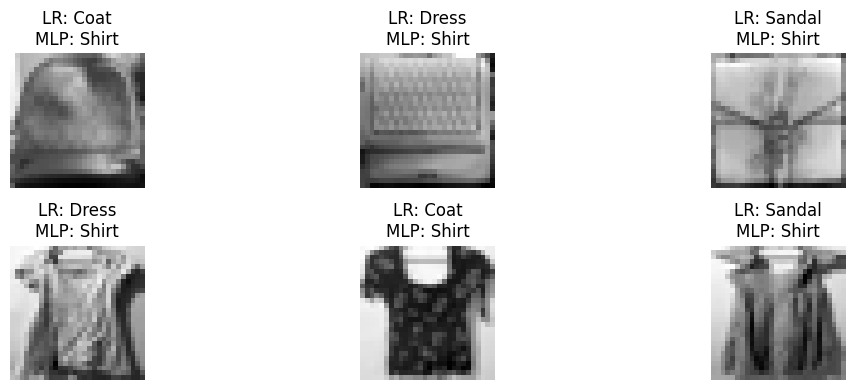

In [26]:
plt.figure(figsize=(12,4))
for i, path in enumerate(image_paths):
    img = X_new[i].reshape(28,28)
    plt.subplot(2,3,i+1)
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.title(f"LR: {class_names[y_pred_new_log[i]]}\nMLP: {class_names[y_pred_new_mlp[i]]}")
plt.tight_layout()
plt.show()